# Introduction to PySpark

```Big data``` has become synonymous with ```data engineering```. But there is a thin line between ```data science``` and ```data engineering```. 
This ```notebook``` will cover everything you need to get started working with ```Pyspark```.

Here is a breakdown of the topics we’ll cover:

- Installation (Skip this step if you are using ```Databrick```)
- Import packages and Initialise a Spark session
- Import Data
- Functions to note
    - Read Data
    - Show Data
        - Inspect data
    - Change Column Names
    - Missing & Replacing Values
    - Select Columns
    - Sort
    - Cast
    - Filter
    - Groupby
    - Joins
- Broadcast/Map Side Joins
- Using ```SQL``` with ```Spark```
- Create New Columns
    - Using Spark Native Functions
    - ```Spark UDFs```
    - Using ```RDDs```
    - ```Pandas UDF```
- Spark Window Functions
    - Ranking
    - Lag
    - Rolling Aggregations¶
    - Running Totals
- Pivot Dataframes
- Unpivot/Stack Dataframes
- Salting
    - Create a salting key
    - Implement a first groupby on the salt key
    - Complete a second group on the original key
- Conclusion
    - Dataframes conversion
    - Output

### 1) Installation

This guide will help you install ```Spark``` on ```Ubuntu 18.04```(**Windows is more tricky**), but the steps should remain the same for Macs too. Ensure you have ```Anaconda``` and ```Python3``` installed. After that, you can just go through these steps:

Download the Spark Binary from the Apache Spark website (https://spark.apache.org/downloads.html).
- **Databricks provides the best platfrom for data engineering using PySpark (https://databricks.com/solutions/data-engineering)**

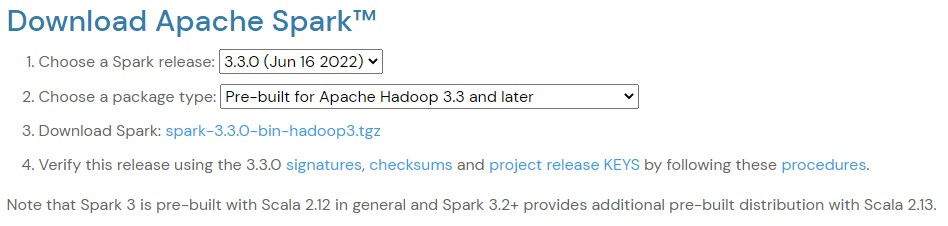

In [1]:
from PIL import Image
Apache_Spark_website = Image.open(r"C:\Users\bunmi\OneDrive\Multiverse\images\sparkimages\downloadapache.jpg")
Apache_Spark_website

I recommend that you download the latest version. After completing this step, unzip it into the home directory, open up the terminal and put these commands in.

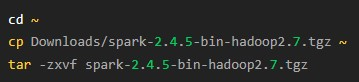

In [2]:
commands = Image.open(r"C:\Users\bunmi\OneDrive\Multiverse\images\sparkimages\image2.jpg")
commands

Next, check your ```Java version``` and install the version that is compatible with ```Spark version```.

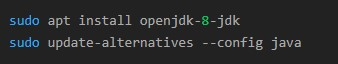

In [3]:
sudo_commands = Image.open(r"C:\Users\bunmi\OneDrive\Multiverse\images\sparkimages\image3.jpg")
sudo_commands

Select the ```Java version``` if required.

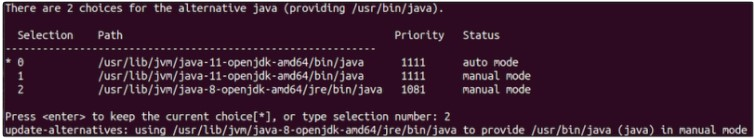

In [4]:
java8 = Image.open(r"C:\Users\bunmi\OneDrive\Multiverse\images\sparkimages\image4.jpg")
java8

Rechecking ```Java version``` should give something like this:

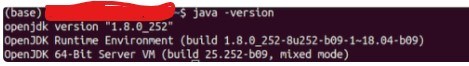

In [5]:
java_version = Image.open(r"C:\Users\bunmi\OneDrive\Multiverse\images\sparkimages\image5.jpg")
java_version

Next, edit your ```~/.bashrc``` file and add the following lines at the end of it:

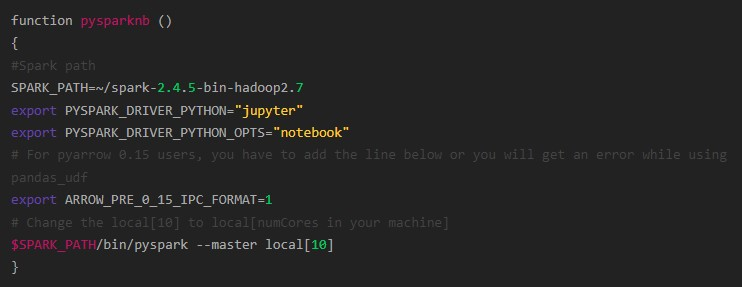

In [6]:
function = Image.open(r"C:\Users\bunmi\OneDrive\Multiverse\images\sparkimages\image6.jpg")
function

Next, run source ```~/.bashrc```:

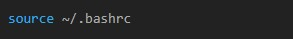

In [7]:
run_source = Image.open(r"C:\Users\bunmi\OneDrive\Multiverse\images\sparkimages\image7.jpg")
run_source

Finally, run the ```pysparknb``` function in the terminal, and you’ll be able to access the notebook. You’ll also be able to open a new notebook since the sparkcontext will be loaded automatically.

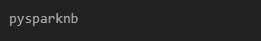

In [8]:
CallSpark = Image.open(r"C:\Users\bunmi\OneDrive\Multiverse\images\sparkimages\image8.jpg")
CallSpark

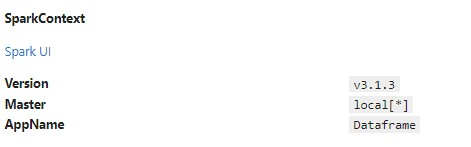

In [9]:
SparkUI = Image.open(r"C:\Users\bunmi\OneDrive\Multiverse\images\sparkimages\image9.jpg")
SparkUI

### 2) Import packages and Initialise a Spark session

In [10]:
import pandas as pd
import random
import numpy as np

In [11]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

### 3) Import Data

The dataset in use for this exercise is that of data science for Covid-19 in South Korea. It is a well detailed dataset on kaggle for the analysis of Covid. 

The goal of this notenook is to showcase functionalities of Spark, and not an exploratory data analysis.

The tables below will be in use;
- ```Cases```
- ```Region```
- ```TimeProvince```

### 4) Functions to note

Now, let’s get acquainted with some basic functions.

#### 4.1 Read Data
We can start by loading the files in our data set using the ```spark.read.load``` command. This command can read ```parquet```, ```json``` and ```csv``` files.

In [12]:
cases_df = spark.read \
             .load(r"C:\Users\bunmi\PycharmProjects\data_eng\s4\Pyspark-With-Python-main\sparkdf\coronavirusdataset\Case.csv",
                   format="csv", 
                   sep=",", 
                   inferSchema="true", 
                   header="true")

See a few rows in the file:

#### 4.2 Show Data

In [13]:
cases_df.show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0403|
|1000007|   Seoul|      Jongno-gu| true|Jongno Community ...|       10| 37.57681|   127.006|
|1000008|   Seoul|        Jung-gu| true|Jung-gu Fashion C...|        7

This file contains the cases grouped by way of infection spread. This arrangement might have helped in the rigorous tracking of coronavirus cases in South Korea.

Use ```.toPandas()``` to convert a spark dataframe to a pandas dataframe.

In [14]:
cases_df.limit(10).toPandas()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,72,37.538621,126.992652
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
3,1000004,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
4,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
5,1000006,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
6,1000007,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
7,1000008,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377
8,1000009,Seoul,from other city,True,Shincheonji Church,8,-,-
9,1000010,Seoul,-,False,overseas inflow,321,-,-


#### 4.2.1 Inspect data
##### Return df column names and data types

In [15]:
cases_df.dtypes 

[('case_id', 'int'),
 ('province', 'string'),
 ('city', 'string'),
 ('group', 'boolean'),
 ('infection_case', 'string'),
 ('confirmed', 'int'),
 ('latitude', 'string'),
 ('longitude', 'string')]

##### Display the content of the dataframe

In [16]:
cases_df.show() 

+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0403|
|1000007|   Seoul|      Jongno-gu| true|Jongno Community ...|       10| 37.57681|   127.006|
|1000008|   Seoul|        Jung-gu| true|Jung-gu Fashion C...|        7

##### Return the columns of the dataframe

In [17]:
cases_df.columns 

['case_id',
 'province',
 'city',
 'group',
 'infection_case',
 'confirmed',
 'latitude',
 'longitude']

##### Return first n rows

In [18]:
cases_df.head() 

Row(case_id=1000001, province='Seoul', city='Yongsan-gu', group=True, infection_case='Itaewon Clubs', confirmed=72, latitude='37.538621', longitude='126.992652')

##### Return first row

In [19]:
cases_df.first() 

Row(case_id=1000001, province='Seoul', city='Yongsan-gu', group=True, infection_case='Itaewon Clubs', confirmed=72, latitude='37.538621', longitude='126.992652')

##### Return the first n rows 

In [20]:
cases_df.take(2) 

[Row(case_id=1000001, province='Seoul', city='Yongsan-gu', group=True, infection_case='Itaewon Clubs', confirmed=72, latitude='37.538621', longitude='126.992652'),
 Row(case_id=1000002, province='Seoul', city='Guro-gu', group=True, infection_case='Guro-gu Call Center', confirmed=98, latitude='37.508163', longitude='126.884387')]

##### Compute summary statistics 

In [21]:
cases_df.describe().show() 

+-------+------------------+--------+---------------+--------------------+-----------------+-----------------+------------------+
|summary|           case_id|province|           city|      infection_case|        confirmed|         latitude|         longitude|
+-------+------------------+--------+---------------+--------------------+-----------------+-----------------+------------------+
|  count|               115|     115|            115|                 115|              115|              115|               115|
|   mean| 3047830.565217391|    null|           null|                null|86.34782608695652|36.41313548780487| 127.8765463414634|
| stddev|2069890.5888150015|    null|           null|                null|434.8065922828229|0.902051126231937|0.8574629641184383|
|    min|           1000001|   Busan|              -|Bonghwa Pureun Nu...|                0|                -|                 -|
|    max|           7000004|   Ulsan|from other city|     overseas inflow|             451

##### Count the number of rows in the dataframe

In [22]:
cases_df.count()

115

##### Count the number of distinct rows in the dataframe

In [23]:
cases_df.distinct().count() 

115

##### Return the schema of the dataframe

In [24]:
cases_df.schema 

StructType(List(StructField(case_id,IntegerType,true),StructField(province,StringType,true),StructField(city,StringType,true),StructField(group,BooleanType,true),StructField(infection_case,StringType,true),StructField(confirmed,IntegerType,true),StructField(latitude,StringType,true),StructField(longitude,StringType,true)))

##### Print the schema of dataframe

In [25]:
cases_df.printSchema() 

root
 |-- case_id: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- group: boolean (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)



##### Print the (logical and physical) plans

In [26]:
cases_df.explain() 

== Physical Plan ==
FileScan csv [case_id#16,province#17,city#18,group#19,infection_case#20,confirmed#21,latitude#22,longitude#23] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex[file:/C:/Users/bunmi/PycharmProjects/data_eng/s4/Pyspark-With-Python-main/spark..., PartitionFilters: [], PushedFilters: [], ReadSchema: struct<case_id:int,province:string,city:string,group:boolean,infection_case:string,confirmed:int,...




#### 4.3 Change Column Names
Use the function below to change the name of a single column in Spark data frame. 

In [27]:
cases_df = cases_df.withColumnRenamed("infection_case","infection_source")

Or for all columns:

In [28]:
cases_df = cases_df.toDF(*['case_id', 'province', 'city', 'group', 'infection_case', 'confirmed',
       'latitude', 'longitude'])

##### Removing Columns
Remove columns by using the ```drop``` function

In [29]:
df = cases_df.drop("infection_case", "group")
df = cases_df.drop(df.province).drop(df.city)

#### 4.4 Missing & Replacing Values

##### Replace null values

In [30]:
cases_df.na.fill(50).show()  

+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0403|
|1000007|   Seoul|      Jongno-gu| true|Jongno Community ...|       10| 37.57681|   127.006|
|1000008|   Seoul|        Jung-gu| true|Jung-gu Fashion C...|        7

##### Return new dataframe omitting rows with null values

In [31]:
cases_df.na.drop().show() 

+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0403|
|1000007|   Seoul|      Jongno-gu| true|Jongno Community ...|       10| 37.57681|   127.006|
|1000008|   Seoul|        Jung-gu| true|Jung-gu Fashion C...|        7

##### Return new dataframe replacing one value with another

In [32]:
cases_df.na \
  .replace(72, 20) \
  .show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       20|37.538621|126.992652|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0403|
|1000007|   Seoul|      Jongno-gu| true|Jongno Community ...|       10| 37.57681|   127.006|
|1000008|   Seoul|        Jung-gu| true|Jung-gu Fashion C...|        7

#### 4.5 Select Columns
We can also select a subset of columns using the select keyword.

In [33]:
cases_df = cases_df.select('province','city','infection_case','confirmed')

In [34]:
cases_df.show()

+--------+---------------+--------------------+---------+
|province|           city|      infection_case|confirmed|
+--------+---------------+--------------------+---------+
|   Seoul|     Yongsan-gu|       Itaewon Clubs|       72|
|   Seoul|        Guro-gu| Guro-gu Call Center|       98|
|   Seoul|  Dongdaemun-gu|       Dongan Church|       20|
|   Seoul|        Guro-gu|Manmin Central Ch...|       41|
|   Seoul|   Eunpyeong-gu|Eunpyeong St. Mar...|       14|
|   Seoul|   Seongdong-gu|    Seongdong-gu APT|       13|
|   Seoul|      Jongno-gu|Jongno Community ...|       10|
|   Seoul|        Jung-gu|Jung-gu Fashion C...|        7|
|   Seoul|from other city|  Shincheonji Church|        8|
|   Seoul|              -|     overseas inflow|      321|
|   Seoul|              -|contact with patient|       18|
|   Seoul|              -|                 etc|       24|
|   Busan|     Dongnae-gu|       Onchun Church|       39|
|   Busan|from other city|  Shincheonji Church|       12|
|   Busan|    

#### 4.6 Sort
Sort by the number of confirmed cases. Note here that the cases data frame will not change after performing this command because it is not assigned to a variable.

In [35]:
cases_df.sort("confirmed").show()

+-----------------+---------------+--------------------+---------+
|         province|           city|      infection_case|confirmed|
+-----------------+---------------+--------------------+---------+
|          Jeju-do|              -|contact with patient|        0|
|       Gangwon-do|              -|contact with patient|        0|
|          Gwangju|              -|                 etc|        0|
|            Busan|from other city|Cheongdo Daenam H...|        1|
|          Gwangju|              -|contact with patient|        1|
|          Jeju-do|from other city|       Itaewon Clubs|        1|
|           Sejong|from other city|  Shincheonji Church|        1|
|           Sejong|              -|                 etc|        1|
|Chungcheongnam-do|              -|contact with patient|        1|
|     Jeollabuk-do|from other city|  Shincheonji Church|        1|
|     Jeollanam-do|from other city|  Shincheonji Church|        1|
|          Incheon|from other city|  Shincheonji Church|      

Use F.desc function to see the most cases at the top.

In [36]:
# descending Sort
from pyspark.sql import functions as F
cases_df.sort(F.desc("confirmed")).show()

+-----------------+---------------+--------------------+---------+
|         province|           city|      infection_case|confirmed|
+-----------------+---------------+--------------------+---------+
|            Daegu|         Nam-gu|  Shincheonji Church|     4510|
|            Daegu|              -|contact with patient|      929|
|            Daegu|              -|                 etc|      724|
| Gyeongsangbuk-do|from other city|  Shincheonji Church|      566|
|            Seoul|              -|     overseas inflow|      321|
|      Gyeonggi-do|              -|     overseas inflow|      225|
|            Daegu|   Dalseong-gun|Second Mi-Ju Hosp...|      196|
| Gyeongsangbuk-do|              -|contact with patient|      192|
| Gyeongsangbuk-do|              -|                 etc|      134|
|            Daegu|         Seo-gu|Hansarang Convale...|      128|
| Gyeongsangbuk-do|   Cheongdo-gun|Cheongdo Daenam H...|      120|
|Chungcheongnam-do|     Cheonan-si|gym facility in C...|      

This shows that most cases in a logical area in South Korea originated from Shincheonji Church.

#### 4.7 Cast
Though there are no occurrence in this dataset, there are situations where Pyspark reads a double as an integer or string. Use the cast function to convert types.

In [37]:
from pyspark.sql.types import IntegerType, StringType, DoubleType

In [38]:
cases_df = cases_df.withColumn('confirmed', F.col('confirmed').cast(IntegerType()))
cases_df = cases_df.withColumn('city', F.col('city').cast(StringType()))

#### 4.8 Filter
Filter a data frame using AND(&), OR(|) and NOT(~) conditions. For example, To find out all the different results for infection_case in Daegu Province with more than 10 confirmed cases.

In [39]:
cases_df.filter((cases_df.confirmed>10) & (cases_df.province=='Daegu')).show()

+--------+------------+--------------------+---------+
|province|        city|      infection_case|confirmed|
+--------+------------+--------------------+---------+
|   Daegu|      Nam-gu|  Shincheonji Church|     4510|
|   Daegu|Dalseong-gun|Second Mi-Ju Hosp...|      196|
|   Daegu|      Seo-gu|Hansarang Convale...|      128|
|   Daegu|Dalseong-gun|Daesil Convalesce...|      100|
|   Daegu|     Dong-gu|     Fatima Hospital|       37|
|   Daegu|           -|     overseas inflow|       24|
|   Daegu|           -|contact with patient|      929|
|   Daegu|           -|                 etc|      724|
+--------+------------+--------------------+---------+



#### 4.9 GroupBy
GroupBy function works with Spark dataframe. It works as in Pandas groupBy version but ```import pyspark.sql.functions```. 

In [40]:
from pyspark.sql import functions as F

cases_df.groupBy(["province","city"]).agg(F.sum("confirmed") ,F.max("confirmed")).show()

+----------------+---------------+--------------+--------------+
|        province|           city|sum(confirmed)|max(confirmed)|
+----------------+---------------+--------------+--------------+
|Gyeongsangnam-do|       Jinju-si|            10|            10|
|           Seoul|        Guro-gu|           139|            98|
|         Daejeon|              -|            27|            10|
|    Jeollabuk-do|from other city|             1|             1|
|Gyeongsangnam-do|Changnyeong-gun|             7|             7|
|           Seoul|              -|           363|           321|
|         Jeju-do|from other city|             1|             1|
|Gyeongsangbuk-do|              -|           336|           192|
|Gyeongsangnam-do|   Geochang-gun|            18|            10|
|         Incheon|from other city|            22|            20|
|           Busan|              -|            72|            29|
|           Daegu|         Seo-gu|           128|           128|
|           Busan|     Su

To change the new column names, use the ```alias``` keyword to rename columns in the ```agg``` command.

In [41]:
cases_df.groupBy(["province","city"]).agg(
    F.sum("confirmed").alias("TotalConfirmed"),\
    F.max("confirmed").alias("MaxFromOneConfirmedCase")\
    ).show()

+----------------+---------------+--------------+-----------------------+
|        province|           city|TotalConfirmed|MaxFromOneConfirmedCase|
+----------------+---------------+--------------+-----------------------+
|Gyeongsangnam-do|       Jinju-si|            10|                     10|
|           Seoul|        Guro-gu|           139|                     98|
|         Daejeon|              -|            27|                     10|
|    Jeollabuk-do|from other city|             1|                      1|
|Gyeongsangnam-do|Changnyeong-gun|             7|                      7|
|           Seoul|              -|           363|                    321|
|         Jeju-do|from other city|             1|                      1|
|Gyeongsangbuk-do|              -|           336|                    192|
|Gyeongsangnam-do|   Geochang-gun|            18|                     10|
|         Incheon|from other city|            22|                     20|
|           Busan|              -|    

#### 4.10 Joins
Load the ```Region.csv``` data to practise joins. 

In [42]:
regions = spark.read.load(r"C:\Users\bunmi\PycharmProjects\data_eng\s4\Pyspark-With-Python-main\sparkdf\coronavirusdataset\Region.csv",format="csv", sep=",", inferSchema="true", header="true")
regions.limit(10).toPandas()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
5,10050,Seoul,Gwanak-gu,37.478290,126.951502,22,33,1,0.89,15.12,4.9,909
6,10060,Seoul,Gwangjin-gu,37.538712,127.082366,22,33,3,1.16,13.75,4.8,723
7,10070,Seoul,Guro-gu,37.495632,126.887650,26,34,3,1.00,16.21,5.7,741
8,10080,Seoul,Geumcheon-gu,37.456852,126.895229,18,19,0,0.96,16.15,6.7,475
9,10090,Seoul,Nowon-gu,37.654259,127.056294,42,66,6,1.39,15.40,7.4,952


Get information in our ```cases``` file by joining the two data frames. 

In [43]:
cases_df = cases_df.join(regions, ['province','city'],how='left')

In [44]:
cases_df.limit(10).toPandas()

,province,city,infection_case,confirmed,code,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,Seoul,Yongsan-gu,Itaewon Clubs,72,10210.0,37.532768,126.990021,15.0,13.0,1.0,0.68,16.87,6.5,435.0
1,Seoul,Guro-gu,Guro-gu Call Center,98,10070.0,37.495632,126.887650,26.0,34.0,3.0,1.00,16.21,5.7,741.0
2,Seoul,Dongdaemun-gu,Dongan Church,20,10110.0,37.574552,127.039721,21.0,31.0,4.0,1.06,17.26,6.7,832.0
3,Seoul,Guro-gu,Manmin Central Church,41,10070.0,37.495632,126.887650,26.0,34.0,3.0,1.00,16.21,5.7,741.0
4,Seoul,Eunpyeong-gu,Eunpyeong St. Mary's Hospital,14,10220.0,37.603481,126.929173,31.0,44.0,1.0,1.09,17.00,6.5,874.0
5,Seoul,Seongdong-gu,Seongdong-gu APT,13,10160.0,37.563277,127.036647,21.0,30.0,2.0,0.97,14.76,5.3,593.0
6,Seoul,Jongno-gu,Jongno Community Center,10,10230.0,37.572999,126.979189,13.0,17.0,3.0,1.71,18.27,6.8,668.0
7,Seoul,Jung-gu,Jung-gu Fashion Company,7,10240.0,37.563988,126.997530,12.0,14.0,2.0,0.94,18.42,7.4,728.0
8,Seoul,from other city,Shincheonji Church,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Seoul,-,overseas inflow,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5. Broadcast/Map Side Joins

This is useful when joining a very big table (approximately 1B rows) with a very small table (~100–200 rows). See the example below.

In [45]:
big = pd.DataFrame({'A':[1,1,1,1,2,2,2,2],'price': [i for i in range(8)]}) 

small = pd.DataFrame({'A':[1,1,1,1,2,2],'agg':['sum','mean','max','min','sum','mean']}) 

In [46]:
big

,A,price
0,1,0
1,1,1
2,1,2
3,1,3
4,2,4
5,2,5
6,2,6
7,2,7


In [47]:
small

,A,agg
0,1,sum
1,1,mean
2,1,max
3,1,min
4,2,sum
5,2,mean


In [48]:
big.merge(small,on = ['A'],how='left')

,A,price,agg
0,1,0,sum
1,1,0,mean
2,1,0,max
3,1,0,min
4,1,1,sum
5,1,1,mean
6,1,1,max
7,1,1,min
8,1,2,sum
9,1,2,mean


There are some operations in Spark there is a need to perform multiple operations to a particular key. When the key data in the Big table is large, it will involve a lot of data movement. A small optimization is to broadcast the small table to each machine when you perform a join. This can be done using the broadcast keyword. 

In [91]:
from pyspark.sql.functions import broadcast
cases_df = cases_df.join(broadcast(regions), ['province','city'],how='left')

In [92]:
cases_df.show()

+--------+---------------+-------+-----+--------------------+---------+---------+----------+--------------------+-----+---------+----------+-----------------------+------------------+----------------+-------------+------------------------+-------------------+------------------+
|province|           city|case_id|group|      infection_case|confirmed| latitude| longitude|            salt_key| code| latitude| longitude|elementary_school_count|kindergarten_count|university_count|academy_ratio|elderly_population_ratio|elderly_alone_ratio|nursing_home_count|
+--------+---------------+-------+-----+--------------------+---------+---------+----------+--------------------+-----+---------+----------+-----------------------+------------------+----------------+-------------+------------------------+-------------------+------------------+
|   Seoul|     Yongsan-gu|1000001| true|       Itaewon Clubs|       72|37.538621|126.992652|     Itaewon Clubs_0|10210|37.532768|126.990021|                     15

### 6. Using SQL with Spark
Let’s try to run some SQL on the cases table.

Register the ```cases_df``` dataframe to a temporary table ```cases_table``` on which we can run SQL operations. As we can see, the result of the SQL select statement is again a Spark data frame.

In [51]:
# Reading Original Cases Back again
cases_df = spark.read.load(r"C:\Users\bunmi\PycharmProjects\data_eng\s4\Pyspark-With-Python-main\sparkdf\coronavirusdataset\Case.csv",format="csv", sep=",", inferSchema="true", header="true")

In [52]:
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession,SQLContext

spark = SparkSession.builder.appName("Basics").getOrCreate()
sc=spark.sparkContext
sqlContext = SQLContext(sc)

In [53]:
cases_df.registerTempTable('cases_table')
newDF = sqlContext.sql('select * from cases_table where confirmed>100')

In [54]:
newDF.show()

+-------+-----------------+---------------+-----+--------------------+---------+---------+----------+
|case_id|         province|           city|group|      infection_case|confirmed| latitude| longitude|
+-------+-----------------+---------------+-----+--------------------+---------+---------+----------+
|1000010|            Seoul|              -|false|     overseas inflow|      321|        -|         -|
|1200001|            Daegu|         Nam-gu| true|  Shincheonji Church|     4510| 35.84008|  128.5667|
|1200002|            Daegu|   Dalseong-gun| true|Second Mi-Ju Hosp...|      196|35.857375|128.466651|
|1200003|            Daegu|         Seo-gu| true|Hansarang Convale...|      128|35.885592|128.556649|
|1200008|            Daegu|              -|false|contact with patient|      929|        -|         -|
|1200009|            Daegu|              -|false|                 etc|      724|        -|         -|
|2000007|      Gyeonggi-do|              -|false|     overseas inflow|      225|  

Many complex SQL queries can be implemented using PySpark.

#### Running Queries Programmatically

##### Registering DataFrames as Views

In [55]:
cases_df.createGlobalTempView("cases")

##### Create temporary view

In [56]:
cases_df.createTempView("cases")

##### Create or replace temporary view

In [57]:
cases_df.createOrReplaceTempView("cases")

##### Query Views

In [58]:
df5 = spark.sql("SELECT * FROM cases").show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0403|
|1000007|   Seoul|      Jongno-gu| true|Jongno Community ...|       10| 37.57681|   127.006|
|1000008|   Seoul|        Jung-gu| true|Jung-gu Fashion C...|        7

In [59]:
casesdf2 = spark.sql("SELECT * FROM global_temp.cases") \
                 .show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0403|
|1000007|   Seoul|      Jongno-gu| true|Jongno Community ...|       10| 37.57681|   127.006|
|1000008|   Seoul|        Jung-gu| true|Jung-gu Fashion C...|        7

### 7. Create New Columns
New columns can be created in a PySpark dataframe using variety of methods. 

#### 7.1 Using Spark Native Functions

The most used method to create a new column is the built-in functions using ```.withcolumn``` along with PySpark SQL functions. 

In essence, String functions, Date functions, and Math functions are already implemented using Spark functions. The first function, ```F.col```, gives access to the column. So, to add 100 to a column, use ```F.col``` as:

In [60]:
casesWithNewConfirmed = cases_df.withColumn("NewConfirmed", 100 + F.col("confirmed"))
casesWithNewConfirmed.show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+------------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|NewConfirmed|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+------------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|         172|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|         198|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|         120|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|         141|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|         114|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0403|         113|
|1000007|   Seoul|      Jongno-gu| true|Jongno

Use math functions like the F.exp function:

In [61]:
casesWithExpConfirmed = cases_df.withColumn("ExpConfirmed", F.exp("confirmed"))
casesWithExpConfirmed.show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+--------------------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|        ExpConfirmed|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+--------------------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|1.858671745284127...|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|3.637970947608805E42|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766| 4.851651954097903E8|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|6.398434935300549...|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|  1202604.2841647768|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0

A lot of other functions are provided in this module, which are enough for most simple use cases. 

#### 7.2 Spark UDFs

Sometimes, there is a need for more complicated activity on a column or multiple columns, ```Spark UDF``` is in use for a more matured Python functionality.

To use ```Spark UDFs```, use the ```F.udf``` function to convert a regular ```Python``` function to a ```Spark UDF```. Also, specify the return type of the function. In this example, the return type is ```StringType()```.

In [62]:
import pyspark.sql.functions as F
from pyspark.sql.types import *
def casesHighLow(confirmed):
    if confirmed < 50: 
        return 'low'
    else:
        return 'high'
    
#convert to a UDF Function by passing in the function and return type of function
casesHighLowUDF = F.udf(casesHighLow, StringType())

CasesWithHighLow = cases_df.withColumn("HighLow", casesHighLowUDF("confirmed"))
#CasesWithHighLow.show()

In [63]:
CasesWithHighLow

DataFrame[case_id: int, province: string, city: string, group: boolean, infection_case: string, confirmed: int, latitude: string, longitude: string, HighLow: string]

#### 7.3 Using RDDs

RDDs can be used when both the Spark UDFs and SQL functions are not enough for a particular use case. 

RDDs helps to create new columns, and useful for people who have experience working with ```RDDs```, which is the basic building block in the Spark ecosystem.

This process makes use of the functionality to convert between ```Row``` and ```Pythondict``` objects. 

Convert a row object to a dictionary, and then work with the dictionary to convert it to row. 

In [64]:
import math
from pyspark.sql import Row
def rowwise_function(row):
    # convert row to python dictionary:
    row_dict = row.asDict()
    # Add a new key in the dictionary with the new column name and value.
    # This might be a big complex function.
    row_dict['expConfirmed'] = float(np.exp(row_dict['confirmed']))
    # convert dict to row back again:
    newrow = Row(**row_dict)
    # return new row
    return newrow

# convert cases dataframe to RDD
cases_rdd = cases_df.rdd

# apply our function to RDD
cases_rdd_new = cases_rdd.map(lambda row: rowwise_function(row))

# Convert RDD Back to DataFrame
#casesNewDf = sqlContext.createDataFrame(cases_rdd_new)

#casesNewDf.show()
#casesNewDf

casesNewDf = sqlContext.createDataFrame(cases_rdd_new)

#### 7.4 Pandas UDF
This functionality was introduced in Spark version 2.3.1. It allows the use of Pandas functionality with Spark. 

Some activities like ```rolling``` and ```windows``` features are better with ```Pandas```. 

The only complexity here is having to provide a schema for the output data frame. Use the original schema of a data frame to create the outSchema.

In [65]:
cases_df.printSchema()

root
 |-- case_id: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- group: boolean (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)



Here, use the Pandas UDF to get normalized confirmed cases grouped by infection_case. The main advantage is being able to work with Pandas data frames in Spark.

In [66]:
from pyspark.sql.types import IntegerType, StringType, DoubleType, BooleanType
from pyspark.sql.types import StructType, StructField

# Declare the schema for the output of our function

outSchema = StructType([StructField('case_id',IntegerType(),True),
                        StructField('province',StringType(),True),
                        StructField('city',StringType(),True),
                        StructField('group',BooleanType(),True),
                        StructField('infection_case',StringType(),True),
                        StructField('confirmed',IntegerType(),True),
                        StructField('latitude',StringType(),True),
                        StructField('longitude',StringType(),True),
                        StructField('normalized_confirmed',DoubleType(),True)
                       ])
# decorate our function with pandas_udf decorator
@F.pandas_udf(outSchema, F.PandasUDFType.GROUPED_MAP)
def subtract_mean(pdf):
    # pdf is a pandas.DataFrame
    v = pdf.confirmed
    v = v - v.mean()
    pdf['normalized_confirmed'] = v
    return pdf

confirmed_groupwise_normalization = cases_df.groupby("infection_case").apply(subtract_mean)

#confirmed_groupwise_normalization.limit(10).toPandas()

C:\Users\bunmi\anaconda3\envs\data_eng\lib\site-packages\pyspark\sql\pandas\group_ops.py:81: UserWarning: It is preferred to use 'applyInPandas' over this API. This API will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


In [67]:
confirmed_groupwise_normalization

DataFrame[case_id: int, province: string, city: string, group: boolean, infection_case: string, confirmed: int, latitude: string, longitude: string, normalized_confirmed: double]

### 8. Spark Window Functions
The focus is on some of the most important window functions available in Spark.

For this activity, import the ```TimeProvince``` dataset because it contains dates, and will help to understand ```window functions```. 

The ```TimeProvince``` dataframe contains daily case information for each province.

In [68]:
timeprovince = spark.read.load(r"C:\Users\bunmi\PycharmProjects\data_eng\s4\Pyspark-With-Python-main\sparkdf\coronavirusdataset\TimeProvince.csv",format="csv", \
                        sep=",", inferSchema="true", header="true")
timeprovince.show()

+----------+----+-----------------+---------+--------+--------+
|      date|time|         province|confirmed|released|deceased|
+----------+----+-----------------+---------+--------+--------+
|2020-01-20|  16|            Seoul|        0|       0|       0|
|2020-01-20|  16|            Busan|        0|       0|       0|
|2020-01-20|  16|            Daegu|        0|       0|       0|
|2020-01-20|  16|          Incheon|        1|       0|       0|
|2020-01-20|  16|          Gwangju|        0|       0|       0|
|2020-01-20|  16|          Daejeon|        0|       0|       0|
|2020-01-20|  16|            Ulsan|        0|       0|       0|
|2020-01-20|  16|           Sejong|        0|       0|       0|
|2020-01-20|  16|      Gyeonggi-do|        0|       0|       0|
|2020-01-20|  16|       Gangwon-do|        0|       0|       0|
|2020-01-20|  16|Chungcheongbuk-do|        0|       0|       0|
|2020-01-20|  16|Chungcheongnam-do|        0|       0|       0|
|2020-01-20|  16|     Jeollabuk-do|     

#### 8.1. Ranking

Get rank as well as dense_rank on a group using this function. For example, to have a column in our cases table that provides the rank of infection_case based on the number of infection_case in a province. 

In [69]:
from pyspark.sql.window import Window
windowSpec = Window().partitionBy(['province']).orderBy(F.desc('confirmed'))
cases_df.withColumn("rank",F.rank().over(windowSpec)).show()

+-------+-----------------+---------------+-----+--------------------+---------+---------+----------+----+
|case_id|         province|           city|group|      infection_case|confirmed| latitude| longitude|rank|
+-------+-----------------+---------------+-----+--------------------+---------+---------+----------+----+
|1700001|           Sejong|         Sejong| true|Ministry of Ocean...|       30|36.504713|127.265172|   1|
|1700002|           Sejong|         Sejong| true|gym facility in S...|        8| 36.48025|   127.289|   2|
|1700004|           Sejong|              -|false|     overseas inflow|        3|        -|         -|   3|
|1700005|           Sejong|              -|false|contact with patient|        3|        -|         -|   3|
|1700003|           Sejong|from other city| true|  Shincheonji Church|        1|        -|         -|   5|
|1700006|           Sejong|              -|false|                 etc|        1|        -|         -|   5|
|1600001|            Ulsan|from other

#### 8.2 Lag 
Data science models may require lag-based features. For example, a model might have variables like last week’s price or the sales quantity for the previous day. 

Create such features using the ```lag function``` with window functions. In this scenario, to get the confirmed cases seven days before, filter to show the results as the first few days of coronavirus cases were zeros. 

The code below shows that the ```lag_7``` day feature is shifted by seven days.

In [70]:
from pyspark.sql.window import Window
windowSpec = Window().partitionBy(['province']).orderBy('date')
timeprovinceWithLag = timeprovince.withColumn("lag_7",F.lag("confirmed", 7).over(windowSpec))

timeprovinceWithLag.filter(timeprovinceWithLag.date>'2020-03-10').show()

+----------+----+--------+---------+--------+--------+-----+
|      date|time|province|confirmed|released|deceased|lag_7|
+----------+----+--------+---------+--------+--------+-----+
|2020-03-11|   0|  Sejong|       10|       0|       0|    1|
|2020-03-12|   0|  Sejong|       15|       0|       0|    1|
|2020-03-13|   0|  Sejong|       32|       0|       0|    1|
|2020-03-14|   0|  Sejong|       38|       0|       0|    2|
|2020-03-15|   0|  Sejong|       39|       0|       0|    3|
|2020-03-16|   0|  Sejong|       40|       0|       0|    6|
|2020-03-17|   0|  Sejong|       40|       0|       0|    8|
|2020-03-18|   0|  Sejong|       41|       0|       0|   10|
|2020-03-19|   0|  Sejong|       41|       0|       0|   15|
|2020-03-20|   0|  Sejong|       41|       0|       0|   32|
|2020-03-21|   0|  Sejong|       41|       2|       0|   38|
|2020-03-22|   0|  Sejong|       41|       3|       0|   39|
|2020-03-23|   0|  Sejong|       42|       3|       0|   40|
|2020-03-24|   0|  Sejon

#### 8.3 Rolling Aggregations
Providing rolling averages is helpful in feature engineering. For example, to have a rolling seven-day sales sum/mean as a feature for in sales regression model. 

Calculate the rolling mean of confirmed cases for the last seven days. A lot of people are already doing so with this data set to see real trends.

In [71]:
from pyspark.sql.window import Window

windowSpec = Window().partitionBy(['province']).orderBy('date').rowsBetween(-6,0)
timeprovinceWithRoll = timeprovince.withColumn("roll_7_confirmed",F.mean("confirmed").over(windowSpec))
timeprovinceWithRoll.filter(timeprovinceWithLag.date>'2020-03-10').show()

+----------+----+--------+---------+--------+--------+------------------+
|      date|time|province|confirmed|released|deceased|  roll_7_confirmed|
+----------+----+--------+---------+--------+--------+------------------+
|2020-03-11|   0|  Sejong|       10|       0|       0| 4.428571428571429|
|2020-03-12|   0|  Sejong|       15|       0|       0| 6.428571428571429|
|2020-03-13|   0|  Sejong|       32|       0|       0|10.857142857142858|
|2020-03-14|   0|  Sejong|       38|       0|       0|              16.0|
|2020-03-15|   0|  Sejong|       39|       0|       0|21.142857142857142|
|2020-03-16|   0|  Sejong|       40|       0|       0|              26.0|
|2020-03-17|   0|  Sejong|       40|       0|       0|30.571428571428573|
|2020-03-18|   0|  Sejong|       41|       0|       0|              35.0|
|2020-03-19|   0|  Sejong|       41|       0|       0|38.714285714285715|
|2020-03-20|   0|  Sejong|       41|       0|       0|              40.0|
|2020-03-21|   0|  Sejong|       41|  

#### 8.4 Running Totals
There are a few things here to understand. First is the rowsBetween(-6,0) function that we are using here. This function has a form of rowsBetween(start,end) with both start and end inclusive. Using this, we only look at the past seven days in a particular window including the current_day. Here, zero specifies the current_row and -6 specifies the seventh row previous to current_row. Remember, we count starting from zero.

So, to get roll_7_confirmed for the date March 22, 2020, we look at the confirmed cases for the dates March 16 to March 22, 2020 and take their mean.

If we had used rowsBetween(-7,-1), we would just have looked at the past seven days of data and not the current_day.

We could also find a use for rowsBetween(Window.unboundedPreceding, Window.currentRow) where we take the rows between the first row in a window and the current_row to get running totals. I am calculating cumulative_confirmed here.

In [72]:
from pyspark.sql.window import Window

windowSpec = Window().partitionBy(['province']).orderBy('date').rowsBetween(Window.unboundedPreceding,Window.currentRow)
timeprovinceWithRoll = timeprovince.withColumn("cumulative_confirmed",F.sum("confirmed").over(windowSpec))
timeprovinceWithRoll.filter(timeprovinceWithLag.date>'2020-03-10').show()

+----------+----+--------+---------+--------+--------+--------------------+
|      date|time|province|confirmed|released|deceased|cumulative_confirmed|
+----------+----+--------+---------+--------+--------+--------------------+
|2020-03-11|   0|  Sejong|       10|       0|       0|                  43|
|2020-03-12|   0|  Sejong|       15|       0|       0|                  58|
|2020-03-13|   0|  Sejong|       32|       0|       0|                  90|
|2020-03-14|   0|  Sejong|       38|       0|       0|                 128|
|2020-03-15|   0|  Sejong|       39|       0|       0|                 167|
|2020-03-16|   0|  Sejong|       40|       0|       0|                 207|
|2020-03-17|   0|  Sejong|       40|       0|       0|                 247|
|2020-03-18|   0|  Sejong|       41|       0|       0|                 288|
|2020-03-19|   0|  Sejong|       41|       0|       0|                 329|
|2020-03-20|   0|  Sejong|       41|       0|       0|                 370|
|2020-03-21|

### 9. Pivot Dataframes
Sometimes, we may need to have the data frame in flat format. This happens frequently in movie data where we may want to show genres as columns instead of rows. We can use pivot to do this. Here, I am trying to get one row for each date and getting the province names as columns.

In [73]:
pivotedTimeprovince = timeprovince.groupBy('date').pivot('province') \
                      .agg(F.sum('confirmed').alias('confirmed') , F.sum('released').alias('released'))
pivotedTimeprovince.limit(10).toPandas()

,date,Busan_confirmed,Busan_released,Chungcheongbuk-do_confirmed,Chungcheongbuk-do_released,Chungcheongnam-do_confirmed,Chungcheongnam-do_released,Daegu_confirmed,Daegu_released,Daejeon_confirmed,...,Jeollabuk-do_confirmed,Jeollabuk-do_released,Jeollanam-do_confirmed,Jeollanam-do_released,Sejong_confirmed,Sejong_released,Seoul_confirmed,Seoul_released,Ulsan_confirmed,Ulsan_released
0,2020-04-13,126,103,45,31,139,109,6819,5395,39,...,17,8,15,6,46,22,610,214,41,33
1,2020-02-26,58,0,5,0,3,0,710,1,5,...,3,1,1,0,1,0,49,8,4,0
2,2020-04-12,126,103,45,29,139,108,6816,5356,39,...,17,8,15,5,46,22,602,202,41,32
3,2020-02-13,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,14,2,0,0
4,2020-04-20,132,115,45,38,141,122,6833,5769,39,...,17,9,15,8,46,29,624,304,43,34
5,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-05-14,144,127,55,43,144,138,6865,6349,43,...,20,14,17,13,47,46,711,564,45,41
7,2020-04-22,134,115,45,39,141,122,6836,5827,40,...,17,9,15,8,46,33,628,322,43,35
8,2020-05-13,144,126,52,43,143,138,6865,6322,43,...,20,14,16,12,47,46,707,558,45,41
9,2020-03-16,107,53,31,6,115,12,6066,734,22,...,7,4,4,2,40,0,253,52,28,7


One thing to note here is that we always need to provide an aggregation with the pivot function, even if the data has a single row for a date.

### 10. Unpivot/Stack Dataframes
This is just the opposite of the pivot. Given a pivoted data frame like above, can we go back to the original?

Yes, we can. But the way to do so is not that straightforward. For one, we will need to replace - with _ in the column names as it interferes with what we are about to do. We can simply rename the columns:

In [74]:
pivotedTimeprovince.columns  

['date',
 'Busan_confirmed',
 'Busan_released',
 'Chungcheongbuk-do_confirmed',
 'Chungcheongbuk-do_released',
 'Chungcheongnam-do_confirmed',
 'Chungcheongnam-do_released',
 'Daegu_confirmed',
 'Daegu_released',
 'Daejeon_confirmed',
 'Daejeon_released',
 'Gangwon-do_confirmed',
 'Gangwon-do_released',
 'Gwangju_confirmed',
 'Gwangju_released',
 'Gyeonggi-do_confirmed',
 'Gyeonggi-do_released',
 'Gyeongsangbuk-do_confirmed',
 'Gyeongsangbuk-do_released',
 'Gyeongsangnam-do_confirmed',
 'Gyeongsangnam-do_released',
 'Incheon_confirmed',
 'Incheon_released',
 'Jeju-do_confirmed',
 'Jeju-do_released',
 'Jeollabuk-do_confirmed',
 'Jeollabuk-do_released',
 'Jeollanam-do_confirmed',
 'Jeollanam-do_released',
 'Sejong_confirmed',
 'Sejong_released',
 'Seoul_confirmed',
 'Seoul_released',
 'Ulsan_confirmed',
 'Ulsan_released']

In [75]:
newColnames = [x.replace("-","_") for x in pivotedTimeprovince.columns]

In [76]:
pivotedTimeprovince = pivotedTimeprovince.toDF(*newColnames)

In [77]:
expression = ""
cnt=0
for column in pivotedTimeprovince.columns:
    if column!='date':
        cnt +=1
        expression += f"'{column}' , {column},"
        
expression = f"stack({cnt}, {expression[:-1]}) as (Type,Value)"

And we can unpivot using this:

In [78]:
unpivotedTimeprovince = pivotedTimeprovince.select('date',F.expr(expression))
unpivotedTimeprovince.show()

+----------+--------------------+-----+
|      date|                Type|Value|
+----------+--------------------+-----+
|2020-04-13|     Busan_confirmed|  126|
|2020-04-13|      Busan_released|  103|
|2020-04-13|Chungcheongbuk_do...|   45|
|2020-04-13|Chungcheongbuk_do...|   31|
|2020-04-13|Chungcheongnam_do...|  139|
|2020-04-13|Chungcheongnam_do...|  109|
|2020-04-13|     Daegu_confirmed| 6819|
|2020-04-13|      Daegu_released| 5395|
|2020-04-13|   Daejeon_confirmed|   39|
|2020-04-13|    Daejeon_released|   23|
|2020-04-13|Gangwon_do_confirmed|   49|
|2020-04-13| Gangwon_do_released|   28|
|2020-04-13|   Gwangju_confirmed|   27|
|2020-04-13|    Gwangju_released|   19|
|2020-04-13|Gyeonggi_do_confi...|  631|
|2020-04-13|Gyeonggi_do_released|  305|
|2020-04-13|Gyeongsangbuk_do_...| 1337|
|2020-04-13|Gyeongsangbuk_do_...| 1020|
|2020-04-13|Gyeongsangnam_do_...|  115|
|2020-04-13|Gyeongsangnam_do_...|   84|
+----------+--------------------+-----+
only showing top 20 rows



And voila! We’ve got our data frame in a vertical format. Quite a few column creations, filters, and join operations are necessary to get exactly the same format as before, but I will not get into those here.

### 11. Salting
Sometimes a lot of data may go to a single executor since the same key is assigned for a lot of rows in our data. Salting is another way to manage data skewness.

So, let’s assume we want to do the sum operation when we have skewed keys. We can start by creating the salted key and then doing a double aggregation on that key as the sum of a sum still equals the sum. To understand this, assume we need the sum of confirmed infection_cases on the cases table and assume that the key infection_cases is skewed. We can do the required operation in three steps.

#### STEP ONE: CREATE A SALTING KEY

We first create a salting key using a concatenation of the infection_case column and a random_number between zero and nine. In case your key is even more skewed, you can split it into even more than 10 parts.

In [79]:
cases_df = cases_df.withColumn("salt_key", F.concat(F.col("infection_case"), F.lit("_"), F.monotonically_increasing_id() % 10))

This is how the table looks after the operation:

In [80]:
cases_df.show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+--------------------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|            salt_key|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+--------------------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|     Itaewon Clubs_0|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|Guro-gu Call Cent...|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|     Dongan Church_2|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|Manmin Central Ch...|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|Eunpyeong St. Mar...|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0

#### STEP TWO: FIRST GROUPBY ON SALT KEY

In [81]:
cases_temp = cases_df.groupBy(["infection_case","salt_key"]).agg(F.sum("confirmed").alias("salt_confirmed"))
cases_temp.show()

+--------------------+--------------------+--------------+
|      infection_case|            salt_key|salt_confirmed|
+--------------------+--------------------+--------------+
|       Onchun Church|     Onchun Church_2|            39|
|Bundang Jesaeng H...|Bundang Jesaeng H...|            22|
|Cheongdo Daenam H...|Cheongdo Daenam H...|             1|
|Seosan-si Laboratory|Seosan-si Laborat...|             9|
|Bonghwa Pureun Nu...|Bonghwa Pureun Nu...|            68|
|Seosan-si Laboratory|Seosan-si Laborat...|             2|
|       Onchun Church|     Onchun Church_7|             2|
| Guro-gu Call Center|Guro-gu Call Cent...|            48|
|Goesan-gun Jangye...|Goesan-gun Jangye...|            11|
|gym facility in C...|gym facility in C...|           103|
|contact with patient|contact with pati...|            58|
|contact with patient|contact with pati...|           929|
|Geochang-gun Woon...|Geochang-gun Woon...|             8|
|Cheongdo Daenam H...|Cheongdo Daenam H...|           12

#### STEP THREE: SECOND GROUP ON THE ORIGINAL KEY

In [82]:
cases_answer = cases_temp.groupBy(["infection_case"]).agg(F.sum("salt_confirmed").alias("final_confirmed"))
cases_answer.show()

+--------------------+---------------+
|      infection_case|final_confirmed|
+--------------------+---------------+
|Eunpyeong St. Mar...|             14|
|Ministry of Ocean...|             30|
|Bundang Jesaeng H...|             22|
|       Milal Shelter|             36|
|       Itaewon Clubs|             81|
| Wonju-si Apartments|              3|
|       Dongan Church|             20|
|     overseas inflow|            777|
|Gyeongsan Cham Jo...|             16|
|Hansarang Convale...|            128|
|Second Mi-Ju Hosp...|            196|
|Gyeongsan Seorin ...|             66|
|Changnyeong Coin ...|              7|
|      Jin-gu Academy|              4|
|Korea Forest Engi...|              3|
|Goesan-gun Jangye...|             11|
|         Wings Tower|             10|
|     Geochang Church|             10|
|     Fatima Hospital|             37|
|Bonghwa Pureun Nu...|             68|
+--------------------+---------------+
only showing top 20 rows



Here, we see how the sum of sum can be used to get the final sum. You can also make use of facts like these:

- Min of min is min
- Max of max is max
- Sum of count is count

You can think about ways in which salting as an idea could be applied to joins too.

### 12. Conclusion

Finally, here are a few odds and ends to wrap up.

CACHING
Spark works on the lazy execution principle. What that means is that nothing really gets executed until we use an action function like the ```.count()``` on a data frame. And if we do a .count function, it generally helps to cache at this step. So, I have made it a point to ```cache()``` my data frames whenever I do a ```.count()``` operation.

In [83]:
cases_df.cache().count()

115

When you work with Spark, you will frequently run with memory and storage issues. Although in some cases such issues might be resolved using techniques like broadcasting, salting or cache, sometimes just interrupting the workflow and saving and reloading the whole data frame at a crucial step has helped me a lot. This helps Spark to let go of a lot of memory that gets used for storing intermediate shuffle data and unused caches.

#### REPARTITIONING
You might want to repartition your data if you feel it has been skewed while working with all the transformations and joins. The simplest way to do so is by using this method:

In [84]:
df = cases_df.repartition(1000)

Sometimes you might also want to repartition by a known scheme as it might be used by a certain join or aggregation operation later on. You can use multiple columns to repartition using this:

In [85]:
df.show()

+-------+-----------------+---------------+-----+--------------------+---------+---------+----------+--------------------+
|case_id|         province|           city|group|      infection_case|confirmed| latitude| longitude|            salt_key|
+-------+-----------------+---------------+-----+--------------------+---------+---------+----------+--------------------+
|6000006| Gyeongsangbuk-do|   Gyeongsan-si| true|Gyeongsan Seorin ...|       66|35.782149|128.801498|Gyeongsan Seorin ...|
|1200006|            Daegu|from other city| true|Cheongdo Daenam H...|        2|        -|         -|Cheongdo Daenam H...|
|1700005|           Sejong|              -|false|contact with patient|        3|        -|         -|contact with pati...|
|6000008| Gyeongsangbuk-do|   Gyeongsan-si| true|Gyeongsan Jeil Si...|       17| 35.84819|  128.7621|Gyeongsan Jeil Si...|
|1000012|            Seoul|              -|false|                 etc|       24|        -|         -|               etc_1|
|1100005|       

You can get the number of partitions in a data frame using this:

In [86]:
df.rdd.getNumPartitions()

1000

##### Repartitioning
###### df with 10 partitions

In [87]:
df.repartition(10)\
   .rdd \
   .getNumPartitions()

10

##### df with 1 partition  

In [88]:
df.coalesce(1).rdd.getNumPartitions()  

1

#### Output

##### Data Structures

In [89]:
# Convert df into an RDD
rdd1 = df.rdd 

# Convert df into a RDD of string
df.toJSON() 

# Return the contents of df as Pandas DataFrame
df.toPandas()  

,case_id,province,city,group,infection_case,confirmed,latitude,longitude,salt_key
0,6000006,Gyeongsangbuk-do,Gyeongsan-si,True,Gyeongsan Seorin Nursing Home,66,35.782149,128.801498,Gyeongsan Seorin Nursing Home_4
1,1200006,Daegu,from other city,True,Cheongdo Daenam Hospital,2,-,-,Cheongdo Daenam Hospital_6
2,1700005,Sejong,-,False,contact with patient,3,-,-,contact with patient_3
3,6000008,Gyeongsangbuk-do,Gyeongsan-si,True,Gyeongsan Jeil Silver Town,17,35.84819,128.7621,Gyeongsan Jeil Silver Town_6
4,1000012,Seoul,-,False,etc,24,-,-,etc_1
...,...,...,...,...,...,...,...,...,...
110,1500006,Daejeon,-,False,etc,9,-,-,etc_4
111,3000004,Gangwon-do,-,False,overseas inflow,14,-,-,overseas inflow_8
112,1500003,Daejeon,from other city,True,Seosan-si Laboratory,2,-,-,Seosan-si Laboratory_1
113,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165,Eunpyeong St. Mary's Hospital_4


##### Write & Save to Files

###### As parquet

In [ ]:
df.select("case_id", "infection_case") \
  .write \
  .save("caseidAndProvince.parquet")

###### As a json file

In [ ]:
df.select("case_id", "infection_case") \
  .write \
  .save("nameAndCity.json", format="json")